當前工作目錄 ==> /home/jovyan
buttom_3D.stl is created


Left Down point: 0 2040
Right Up point:  3800 9000
height (min, max) 0.0 357.21


y is 2040
y is 2060
y is 2080
y is 2100
y is 2120
y is 2140
y is 2160
y is 2180
y is 2200
y is 2220
y is 2240
y is 2260
y is 2280
y is 2300
y is 2320
y is 2340
y is 2360
y is 2380
y is 2400
y is 2420
y is 2440
y is 2460
y is 2480
y is 2500
y is 2520
y is 2540
y is 2560
y is 2580
y is 2600
y is 2620
y is 2640
y is 2660
y is 2680
y is 2700
y is 2720
y is 2740
y is 2760
y is 2780
y is 2800
y is 2820
y is 2840
y is 2860
y is 2880
y is 2900
y is 2920
y is 2940
y is 2960
y is 2980
y is 3000
y is 3020
y is 3040
y is 3060
y is 3080
y is 3100
y is 3120
y is 3140
y is 3160
y is 3180
y is 3200
y is 3220
y is 3240
y is 3260
y is 3280
y is 3300
y is 3320
y is 3340
y is 3360
y is 3380
y is 3400
y is 3420
y is 3440
y is 3460
y is 3480
y is 3500
y is 3520
y is 3540
y is 3560
y is 3580
y is 3600
y is 3620
y is 3640
y is 3660
y is 3680
y is 3700
y is 3720
y is 3740
y is 37

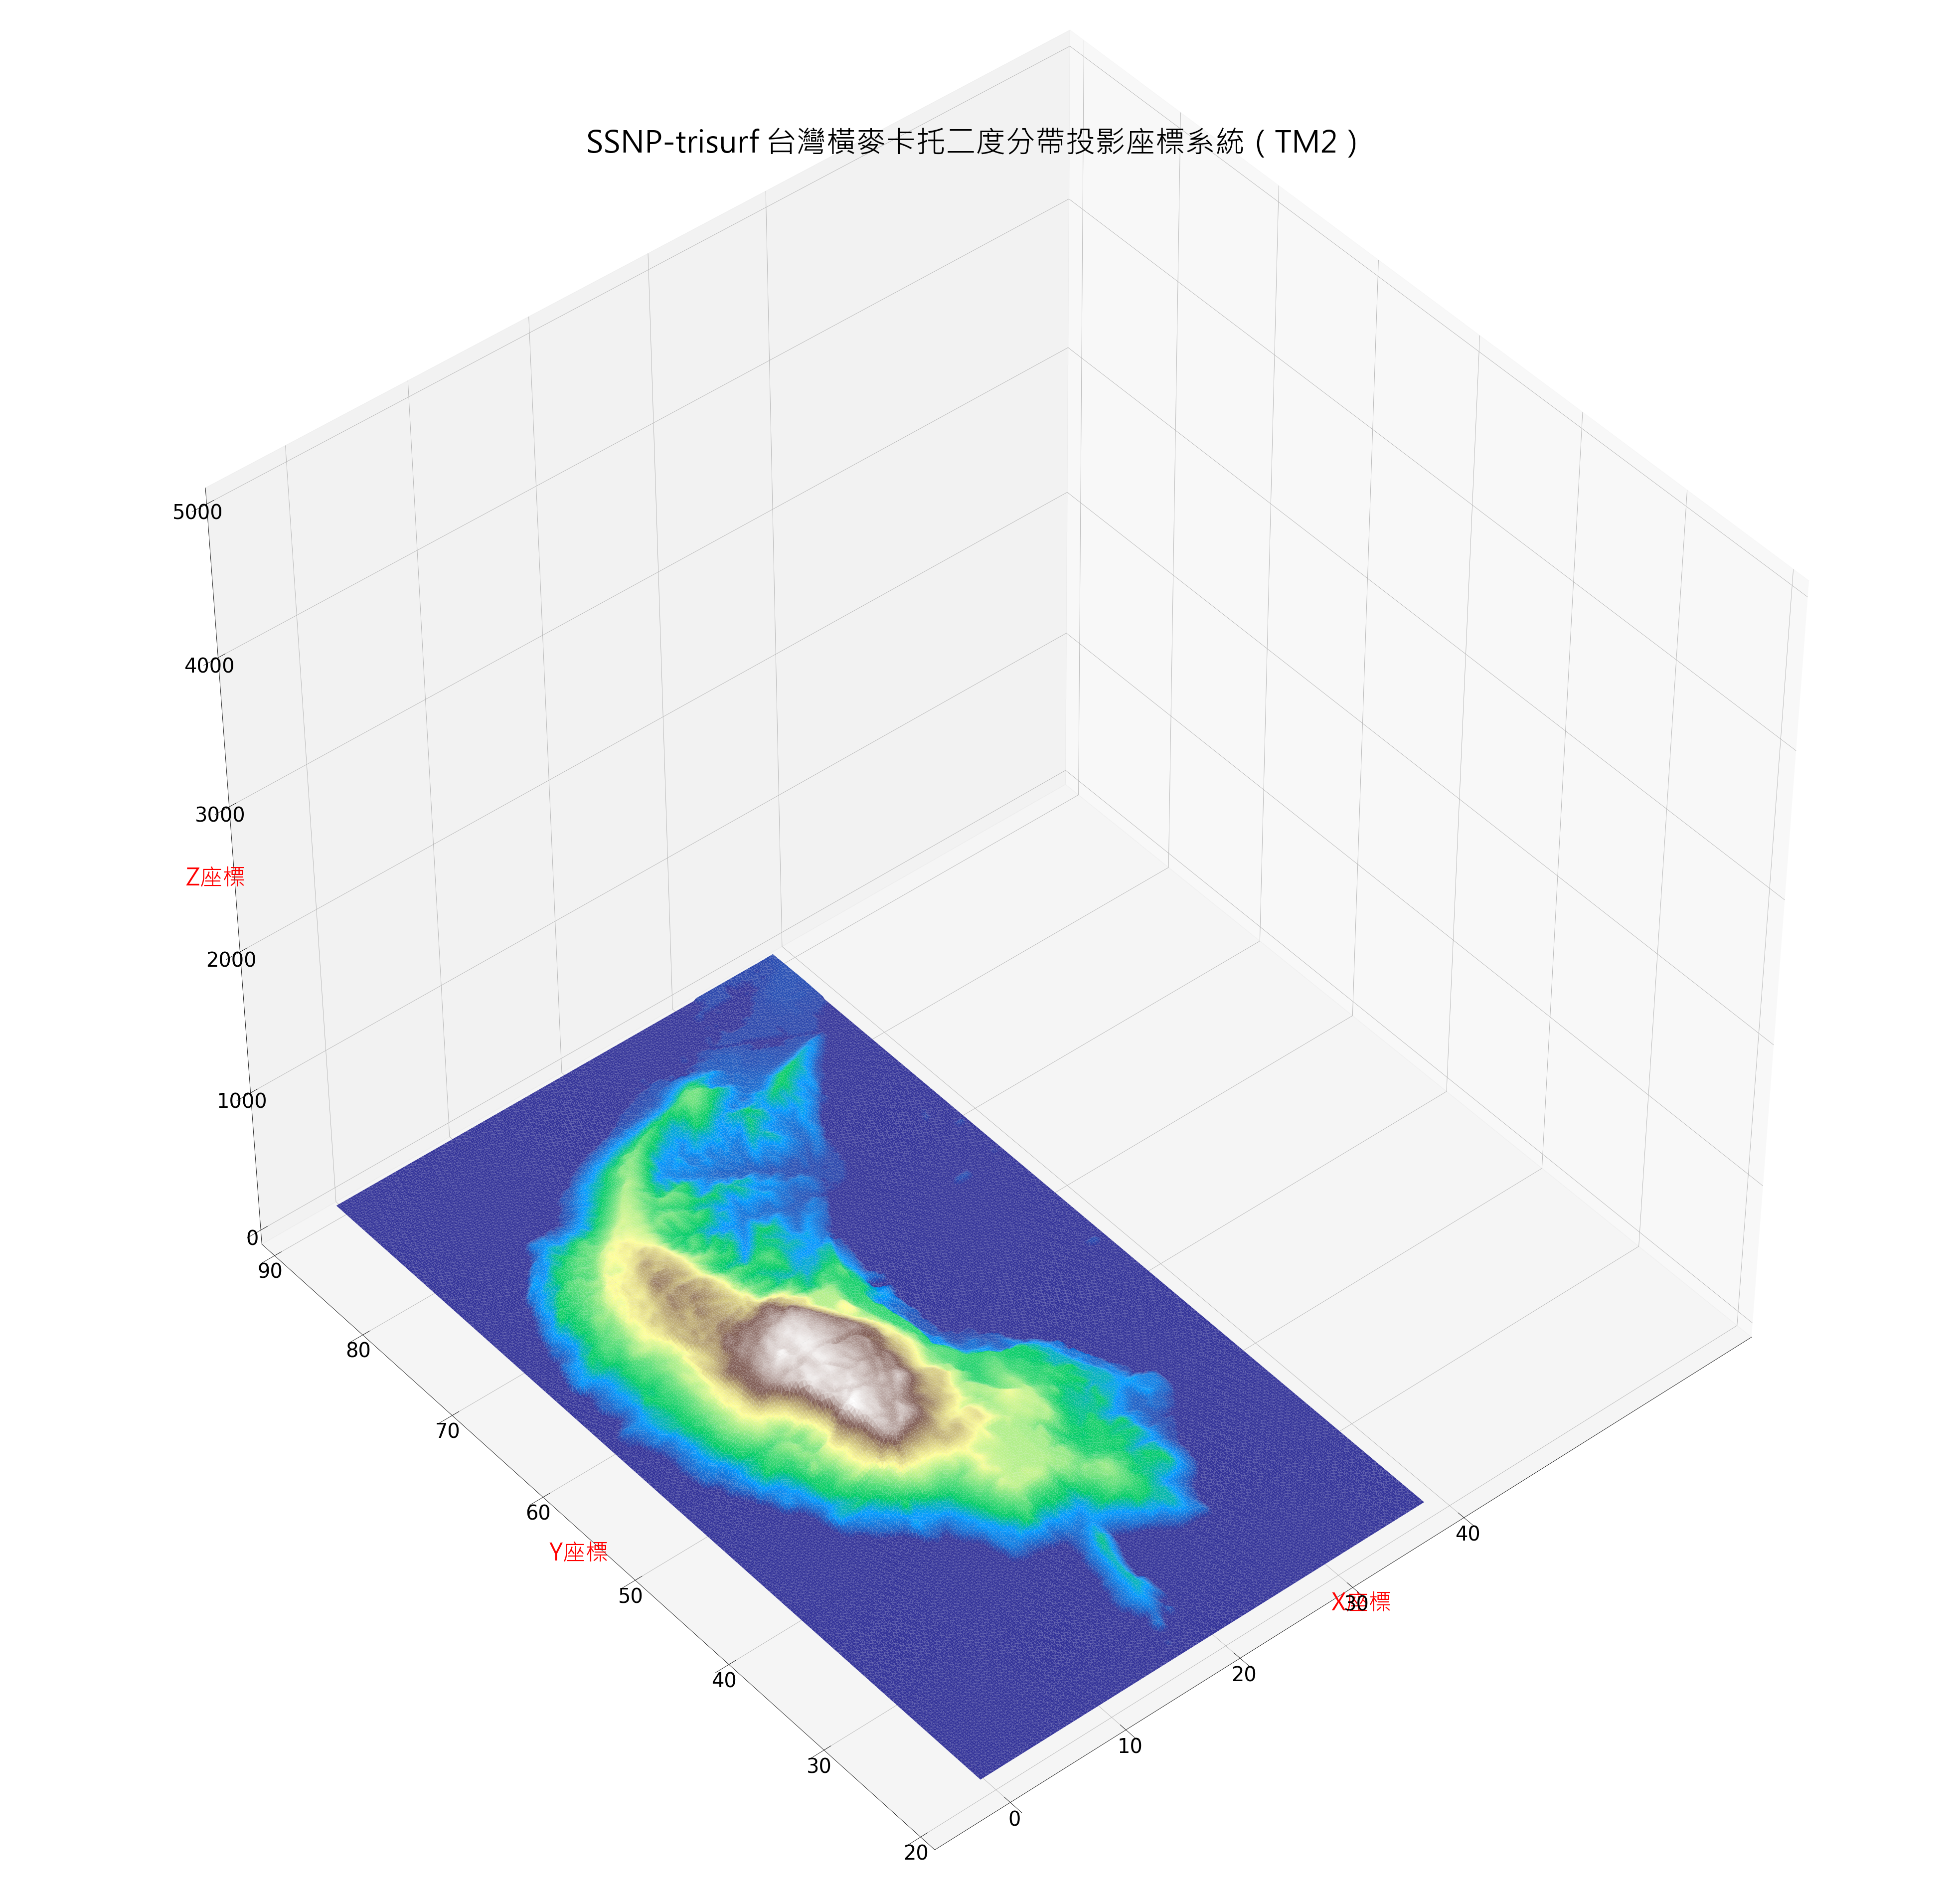

In [5]:
# stl-SSNP-04.py
# 2021-11-27
#
# read dem-all-7.csv file
# x,y,z = np.loadtxt(path_data + 'dem_all-7.csv', unpack=True)
#
# ndarray是一個可以裝載相同類型資料的多維容器，
#        維度的大小及資料類型分別由 shape及 dtype來定義。
#
from datetime import datetime
dt_start = datetime.now()
#
import os
# to fix matplotlib warning
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
path = os.getcwd()
print('當前工作目錄 ==>', path)
#
import numpy as np
from stl import mesh
#
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fontManager
#
path_data  = './data/'
path_3Dstl = './3Dstl/'
#
matplotlib.rcParams['pdf.fonttype'] = 42
myfont = fontManager.FontProperties(fname='./fonts/msjh.ttc')
#
# up layer verteices
A_up = ( 0.0,  0.0, 0.0) # 0
B_up = (40.0,  0.0, 0.0) # 1
C_up = (40.0, 78.0, 0.0) # 2
D_up = ( 0.0, 78.0, 0.0) # 3
#
# down layer verteices
a_dn = ( 0.0,  0.0,-1.0) # 4
b_dn = (40.0,  0.0,-1.0) # 5
c_dn = (40.0, 78.0,-1.0) # 6
d_dn = ( 0.0, 78.0,-1.0) # 7
#
# up face is empty
faces = [[C_up,c_dn,d_dn],[d_dn,D_up,C_up], # front
         [A_up,a_dn,b_dn],[b_dn,B_up,A_up], # back
         [B_up,b_dn,c_dn],[c_dn,C_up,B_up], # left
         [d_dn,a_dn,D_up],[a_dn,A_up,D_up], # right
         [d_dn,c_dn,a_dn],[c_dn,b_dn,a_dn]] # down
#
buttom_faces = np.zeros(10, dtype=mesh.Mesh.dtype)
#
for i in range(0,10,1) :
    buttom_faces['vectors'][i] = np.array(faces[i])
# end for
#
# Create the mesh
buttom_3D = mesh.Mesh(buttom_faces)
# Write the mesh to file "cube.stl"
buttom_3D.save(path_3Dstl + 'buttom_3D.stl')
#
print('buttom_3D.stl is created')
print ('\n')
#
## =========================================
#
# 台灣橫麥卡托二度分帶投影座標系統（TM2）
#
float_To_int = np.vectorize(np.int32)
#
data = np.loadtxt(path_data + 'dem-all-7.csv',delimiter=',',dtype='float')
min_item = np.amin(data, axis=0) # axis=0 --> min of each column
max_item = np.amax(data, axis=0) # axis=0 --> max of each column
print ('Left Down point:', float_To_int(min_item[0]), float_To_int(min_item[1]))
print ('Right Up point: ' , float_To_int(max_item[0]), float_To_int(max_item[1]))
print ('height (min, max)', min_item[2], max_item[2])
print ('\n')
#
# Left Down point: 0, 2040
# Right Up point:  3800, 9000
# height (min, max) 0.0, 357.21
#
TM2_X = float_To_int(data[..., 0]) # 二度分帶 X座標
TM2_Y = float_To_int(data[..., 1]) # 二度分帶 Y座標
TM2_Z = data[..., 2]               # DEM file z value, float type
#
# XYlist is sorted (x, y), first order is y, then x
#
XYlist = list(zip(TM2_X,TM2_Y))
#
# X, Y value
X = np.arange(-100, 3820, 20)
Y = np.arange(2040, 9020, 20)
Xmesh, Ymesh = np.meshgrid(X, Y)  # x-y 平面的網格
#
# X -100 .. 3800
# Y 2040 .. 9000
# 6980/20 ==> 349
# 3920/20 ==> 196
#
Zmesh = np.zeros(shape=(349,196),dtype=np.float16)
i = 0 ; j = 0
#
for y in np.arange(2040, 9020, 20) :
    print('y is', y)
    z = np.zeros(shape=(196),dtype=np.float16)
    zi = 0
    for x in np.arange(-100, 3820, 20):
        if (x,y) in XYlist :
            # print(str(zi), list([x,y]), TM2_Z[i])
            z[zi] = TM2_Z[i]
            i = i + 1
        else :
            # print(str(zi))
            z[zi] = 0.0
        # end if
        zi = zi + 1
    #end for
    # pprint.pprint(z)
    Zmesh[j] = z
    j = j + 1
#end for
#
factor_3D = 0.01
Xmesh_3D = np.around(factor_3D * Xmesh, 1)
Ymesh_3D = np.around(factor_3D * Ymesh, 1)
Zmesh_3X = np.around(Zmesh)
Zmesh_3D = Zmesh_3X.astype(int)
#
XYZ_list = np.stack([Xmesh_3D, Ymesh_3D, Zmesh_3D], axis=2)
xyz_list = list(XYZ_list)
#
print(str(np.shape(xyz_list)))
#
final_list = []
for row in xyz_list :
    row_list = []
    for item in row :
        row_list.append(list(item))
    # end for
    final_list.append(row_list)
# end for
#
xyz_list = [xyz for sublist in final_list for xyz in sublist]
#
xs = [xyz[0] for xyz in xyz_list]
ys = [xyz[1] for xyz in xyz_list]
zs = [xyz[2] for xyz in xyz_list]
#
fig = plt.figure(figsize=(70,70))
ax  = fig.add_subplot(1,1,1, projection='3d')
#
plt.xlim(-5, 65)    # xlim, ylim, zlim need to be same
plt.ylim(20, 90)    
ax.set_zlim(0, 5000)
#
x_ticks = np.linspace( 0,40,5)
y_ticks = np.linspace(20,90,8)
#
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.tick_params(labelsize=40)
#
plt.xlabel   ('X座標', fontproperties=myfont, fontsize=46)
plt.ylabel   ('Y座標', fontproperties=myfont, fontsize=46)
ax.set_zlabel('Z座標', fontproperties=myfont, fontsize=46)
#
ax.xaxis.label.set_color('red')
ax.yaxis.label.set_color('red')
ax.zaxis.label.set_color('red')
#
# 此程式碼使輸出之3D圖像Z軸比例更正確
plt.gca().set_aspect('auto', adjustable='box') # set X,Y same ratio & scale
#
# -------------------------------------------------------------------------------------
#
# 設定子圖的標題
ax.set_title('SSNP-trisurf 台灣橫麥卡托二度分帶投影座標系統（TM2）', fontproperties=myfont, fontsize=60)
#
ax.plot_trisurf(xs, ys, zs, cmap=plt.cm.terrain)
ax.view_init(elev=45, azim=230)
plt.draw()
#
# plt.savefig(path_3Dstl + "SSNP-trisurf.png",format="png",dpi=300, bbox_inches='tight')
plt.savefig(path_3Dstl + "SSNP-trisurf-terrain.png",format="png",dpi=150, bbox_inches='tight')
#
print(dt_start)
dt_end = datetime.now()
print(dt_end)
#
print('done')
#